![penguin.png](./banner.jpg)

# <center>**Machine learning : Etude du dataset manchots de l'antarctique**</center>

Le but de ce projet est d'étudier un dataset afin d'y appliquer des algorithmes de machine learning.
Pour mener a bien l'étude, nous avons donc choisis de prendre le jeu de données suivant :

+ https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

Il s'agit d'un dataset (jeu de données) sur les différentes espèces de machots présentes sur l'archipel Palmer. Un ensemble d'îles au large de la côte nord-ouest de la péninsule Antarctique dont il est séparé par le détroit de Gerlache.

Imports des modules nécessaire dans la réalisation du projet

In [392]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np 
import os 

In [393]:
cwd = os.getcwd()

In [452]:
df = pd.read_csv(cwd+'/penguins_lter.csv')

In [453]:
pd.set_option("display.max_rows", None)

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [455]:
# Add Culmen Surface (mm2), Total Lenght (mm), Delta Tot (o/oo)
df["Culmen Surface (mm2)"] = df["Culmen Length (mm)"] * df["Culmen Depth (mm)"]
df["Total Lenght (mm)"] = df["Culmen Length (mm)"] + df["Culmen Depth (mm)"] + df["Flipper Length (mm)"]
df["Delta Tot (o/oo)"] = df["Delta 15 N (o/oo)"] + df["Delta 13 C (o/oo)"]
df['Volumic mass (g.mm-3)'] = df["Body Mass (g)"]/(df["Culmen Length (mm)"]* df["Culmen Depth (mm)"] * df["Flipper Length (mm)"])

**Dataset Information**

Il y a sept variables dans notre ensemble de données actuel. Parmi ces variables, l'espèce, l'île et le sexe sont catégoriques, et les variables restantes sont des variables numériques. Le DataSet contient des informations sur les pingouins. Ces informations sont dans l'ordre de :

> **Species:** Types de pingouins dans le DataSet

> **Island:** Îles de pingouins dans le DataSet

> **Culmen_length_mm:** Longueurs des culmen (bec) en millimètres des pingouins dans le DataSet

> **Culmen_depth_mm:** Profondeur du culmen (bec) en millimètres des pingouins dans le DataSet

> **Flipper_length:** Longueurs des nageoires en millimètres des manchots dans le DataSet

> **Body_mass_g:** Poids en grammes des manchots dans le DataSet

> **Sex:** Les sexes des pingouins dans le DataSet

 
![penguin_.png](./penguin_.png)

In [456]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

In [457]:
df.shape

(344, 21)

In [458]:
nrows = df.shape[0]
ncols = df.shape[1]

In [459]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments',
       'Culmen Surface (mm2)', 'Total Lenght (mm)', 'Delta Tot (o/oo)',
       'Volumic mass (g.mm-3)'],
      dtype='object')

In [460]:
df.dtypes

studyName                 object
Sample Number              int64
Species                   object
Region                    object
Island                    object
Stage                     object
Individual ID             object
Clutch Completion         object
Date Egg                  object
Culmen Length (mm)       float64
Culmen Depth (mm)        float64
Flipper Length (mm)      float64
Body Mass (g)            float64
Sex                       object
Delta 15 N (o/oo)        float64
Delta 13 C (o/oo)        float64
Comments                  object
Culmen Surface (mm2)     float64
Total Lenght (mm)        float64
Delta Tot (o/oo)         float64
Volumic mass (g.mm-3)    float64
dtype: object

In [461]:
df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  Culmen Surface (mm2)  Total Lenght (mm)  \
0  Not enough blood for isotopes.                731.17              238.8   
1                             NaN                687.30              242.9   
2                             NaN                725.40              253.3   
3              Adult not sampled.                   NaN                NaN   
4                             NaN                708.31              249.0   

   Delta Tot (o/oo)  Volumic mass (g.mm-3)  
0               NaN               0.028336  
1         -15.74498               0.029725  
2         -16.96481               0.022976  
3               NaN                    NaN  
4         -16.55775               0.025237

In [462]:
#Connaitre le pourcentage de NaN selon le nombre de cellules du DataFrame
nb_cells = np.product(df.shape)
nb_na = df.isna().sum().sum()
nb_na / nb_cells * 100

5.301771871539313

In [463]:
def count_na(df) : 
    mask = df.isna().sum() > 0
    missing_values_count = df.isna().sum()
    return missing_values_count[mask].sort_values(ascending=False)

In [464]:
def count_na_percent(df, threshold) : 
    mask = df.isna().sum() > threshold
    missing_values_count = df.isna().sum()
    return (missing_values_count[mask] / len(df) *100).sort_values(ascending=False)

In [465]:
count_na_percent(df, 0)

Comments                 92.441860
Delta 15 N (o/oo)         4.069767
Delta Tot (o/oo)          4.069767
Delta 13 C (o/oo)         3.779070
Sex                       2.906977
Culmen Length (mm)        0.581395
Culmen Depth (mm)         0.581395
Flipper Length (mm)       0.581395
Body Mass (g)             0.581395
Culmen Surface (mm2)      0.581395
Total Lenght (mm)         0.581395
Volumic mass (g.mm-3)     0.581395
dtype: float64

In [466]:
missing_values_count = count_na_percent(df[categorical_cols], 0)
missing_values_count.sort_values(ascending=False)

Comments    92.441860
Sex          2.906977
dtype: float64

In [467]:
missing_values_count = count_na_percent(df[numerical_cols], 0)
missing_values_count.sort_values(ascending=False)

Delta 15 N (o/oo)        4.069767
Delta Tot (o/oo)         4.069767
Delta 13 C (o/oo)        3.779070
Culmen Length (mm)       0.581395
Culmen Depth (mm)        0.581395
Flipper Length (mm)      0.581395
Body Mass (g)            0.581395
Culmen Surface (mm2)     0.581395
Total Lenght (mm)        0.581395
Volumic mass (g.mm-3)    0.581395
dtype: float64

In [468]:
df = df.drop(["Comments"], axis=1)

In [469]:
df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  Culmen Surface (mm2)  \
0    MALE                NaN                NaN                731.17   
1  FEMALE            8.94956          -24.69454                687.30   
2  FEMALE            8.36821          -25.33302                725.40   
3     NaN                NaN                NaN                   NaN   
4  FEMALE            8.76651          -25.32426                708.31   

   Total Lenght (mm)  Delta Tot (o/oo)  Volumic mass (g.mm-3)  
0              238.8               NaN               0.028336  
1              242.9         -15.74498               0.029725  
2              253.3         -16.96481               0.022976  
3                NaN               NaN                    NaN  
4              249.0         -16.55775               0.025237

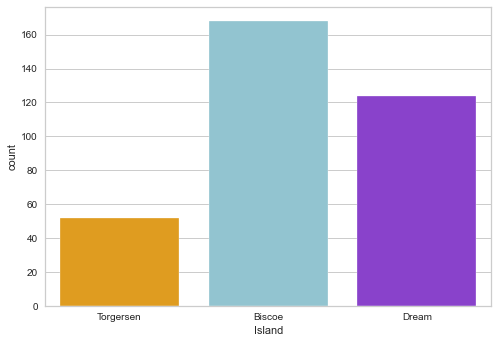

In [470]:
ax = plt.subplots()
ax = sns.countplot(data=df, x="Island", palette=["orange", "c", "#8A2BE2"])

In [486]:
df_sex = df
# df_sex.dropna()
df_sex["Sex"] = df_sex["Sex"].replace(np.nan, 'None Specified')
df_sex["Sex"] = df_sex["Sex"].replace('.', 'None Specified')

In [487]:
df_sex.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

              Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  Culmen Surface (mm2)  \
0            MALE                NaN                NaN                731.17   
1          FEMALE            8.94956          -24.69454                687.30   
2          FEMALE            8.36821          -25.33302                725.40   
3  None Specified                NaN                NaN                   NaN   
4          FEMALE            8.76651          -25.32426                708.31   

   Total Lenght (mm)  Delta Tot (o/oo)  Volumic mass (g.mm-3)  
0              238.8               NaN               0.028336  
1              242.9         -15.74498               0.029725  
2              253.3         -16.96481               0.022976  
3                NaN               NaN                    NaN  
4              249.0         -16.55775               0.025237

In [488]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)    152
Gentoo penguin (Pygoscelis papua)      124
Chinstrap                               68
Name: Species, dtype: int64

In [489]:
df["Species"] = df_sex["Species"].replace("Adelie Penguin (Pygoscelis adeliae)", 'Adelie')
df["Species"] = df_sex["Species"].replace("Gentoo penguin (Pygoscelis papua)", 'Gentoo')
df["Species"] = df_sex["Species"].replace("Chinstrap penguin (Pygoscelis antarctica)", 'Chinstrap')

(-1.1279276460500207,
 1.1187535413556606,
 -1.1186900237692792,
 1.1008900011318705)

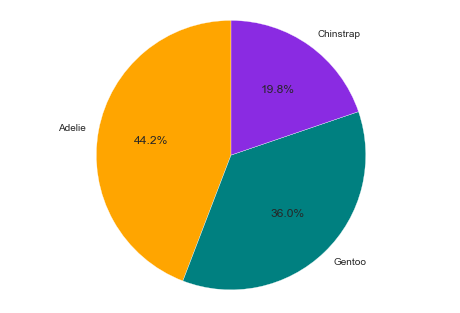

In [490]:
labels = ['Adelie', 'Gentoo', 'Chinstrap']
sizes = [152, 124, 68]
colors = ["orange", "teal", "blueviolet"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=["orange", "teal", "blueviolet"])
ax1.axis('equal')

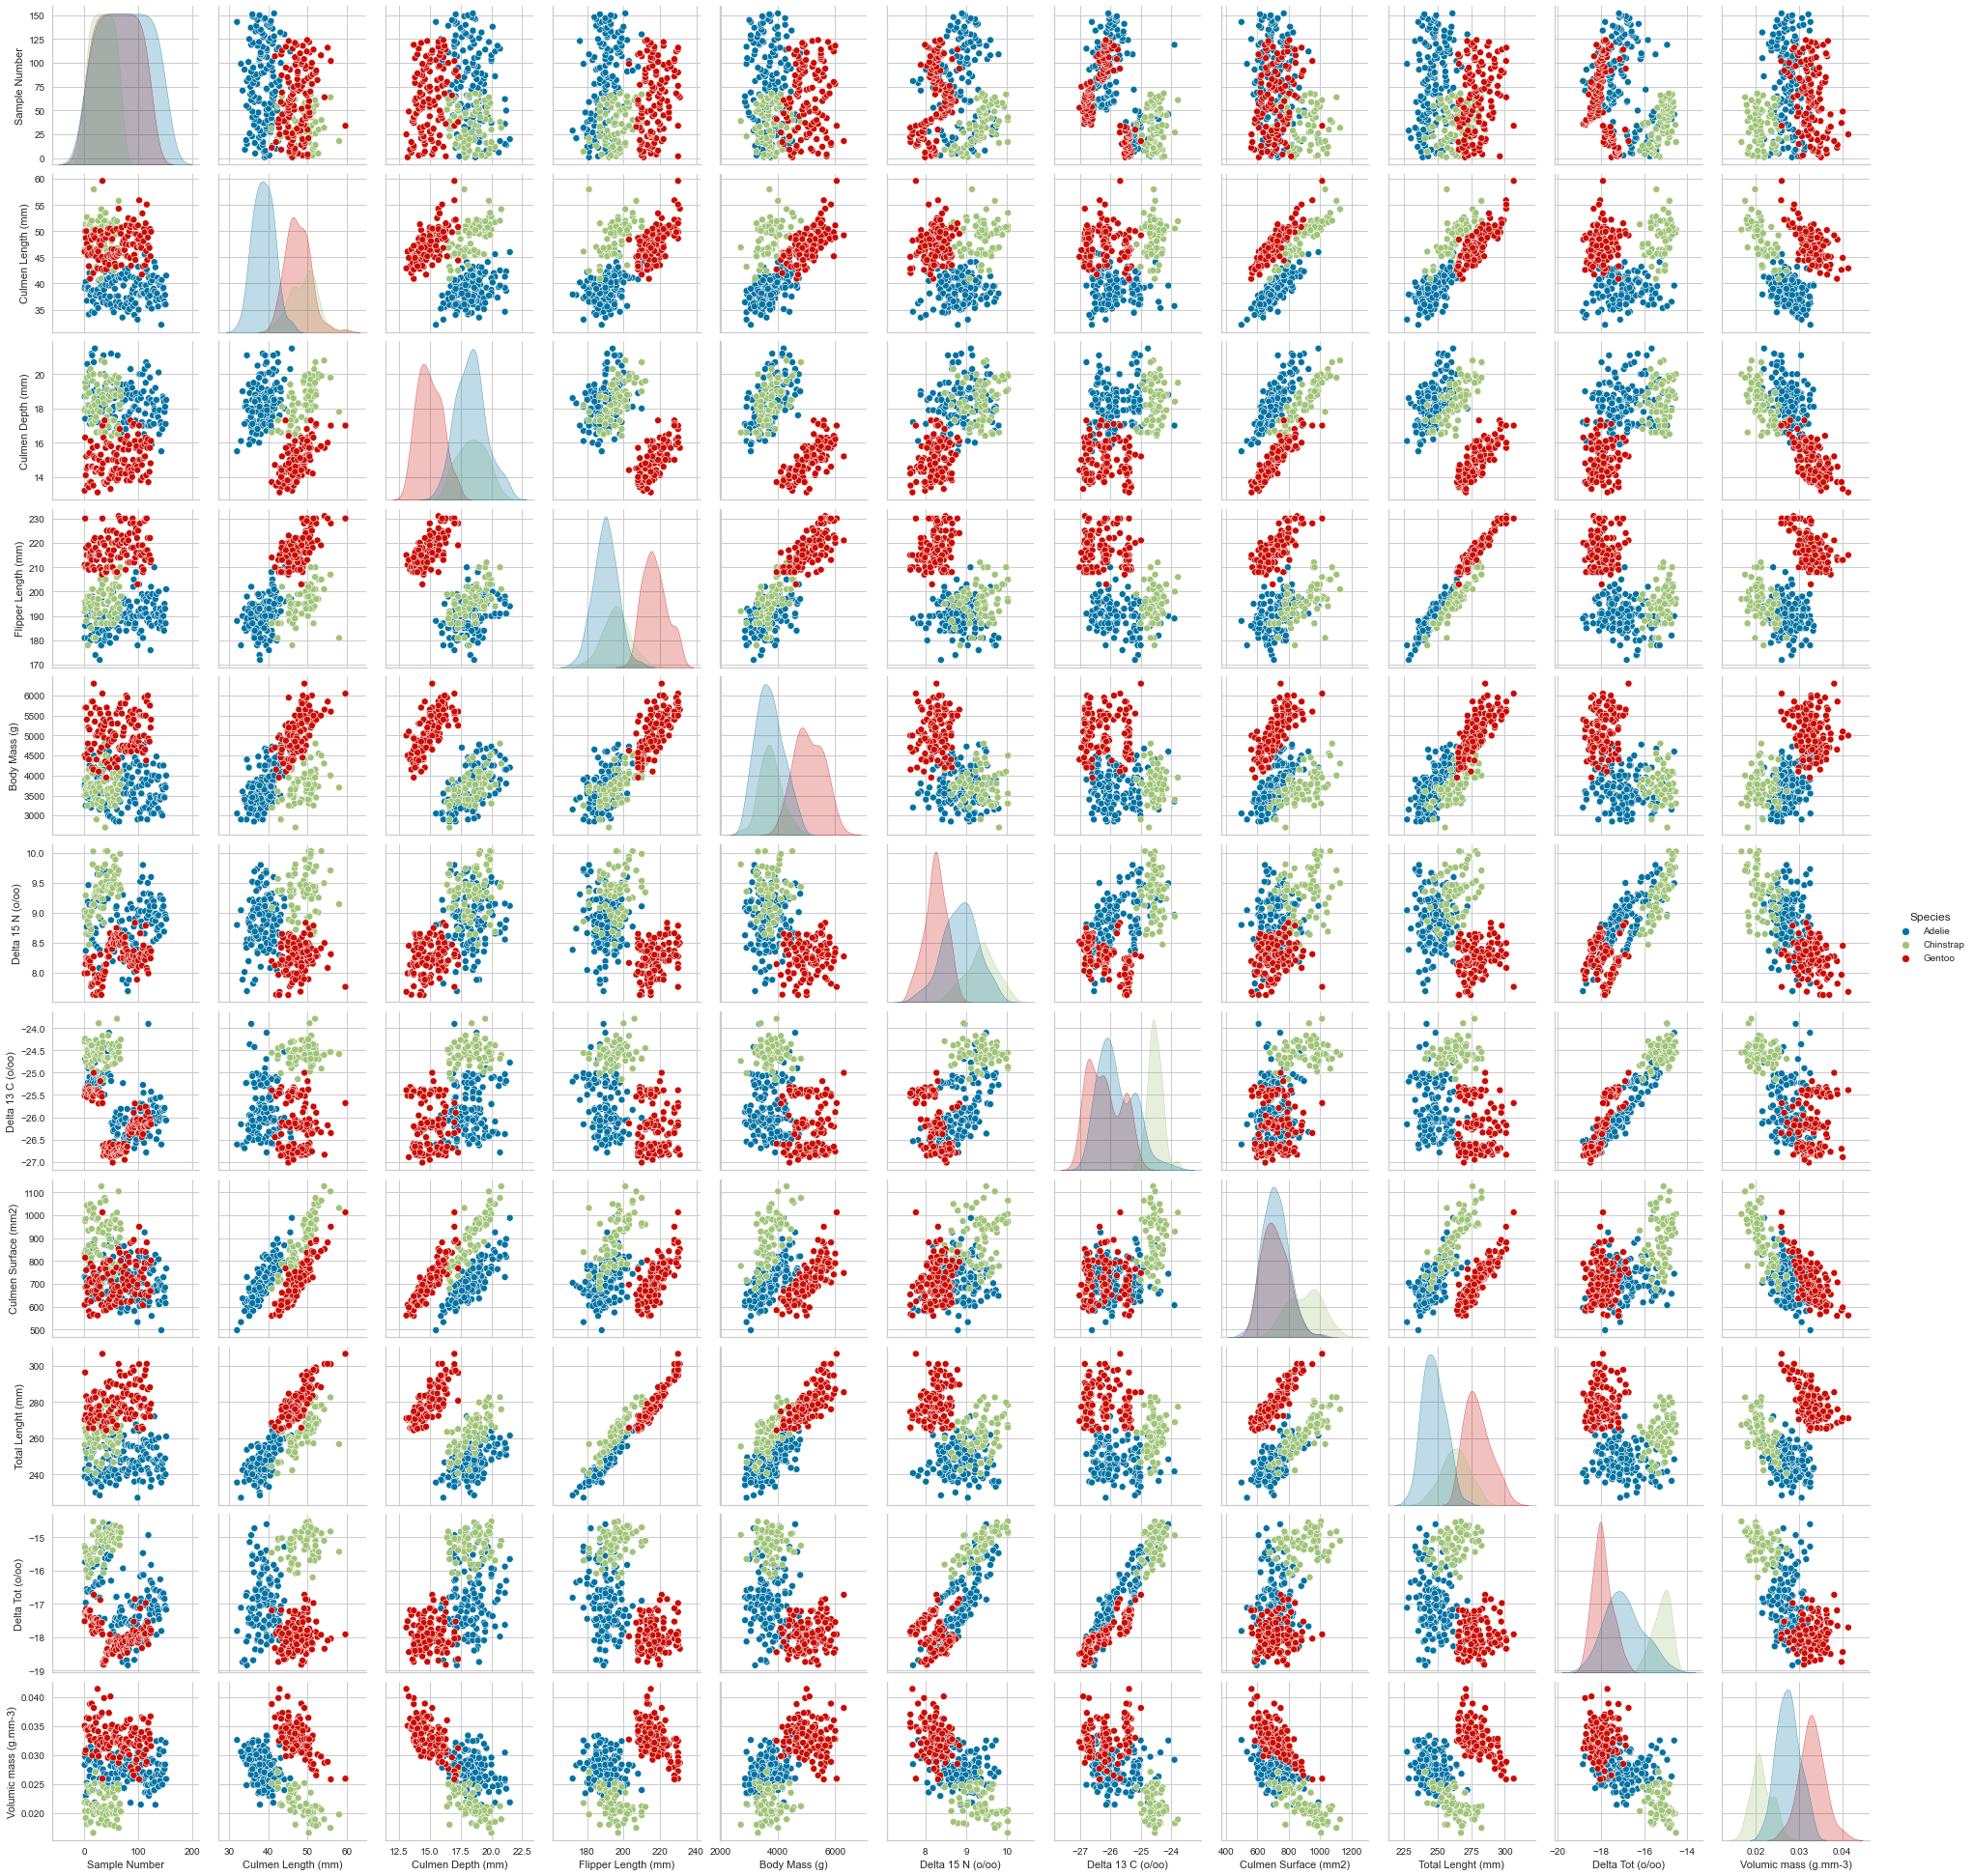

In [491]:
# Scatter Plot
sns.pairplot(df_sex, hue="Species")

In [492]:
df_none = df[df.Sex != 'None Specified']

In [493]:
df_none[df_none['Species']=='Adelie'].groupby('Sex').describe().transpose()

Sex                               FEMALE         MALE
Sample Number         count    73.000000    73.000000
                      mean     78.315068    79.684932
                      std      43.461630    42.843020
                      min       2.000000     1.000000
                      25%      41.000000    44.000000
                      50%      79.000000    80.000000
                      75%     115.000000   116.000000
                      max     151.000000   152.000000
Culmen Length (mm)    count    73.000000    73.000000
                      mean     37.257534    40.390411
                      std       2.028883     2.277131
                      min      32.100000    34.600000
                      25%      35.900000    39.000000
                      50%      37.000000    40.600000
                      75%      38.800000    41.500000
                      max      42.200000    46.000000
Culmen Depth (mm)     count    73.000000    73.000000
                      mean     17.621918    19.072603
                      std       0.942993     1.018886
                      min      15.500000    17.000000
                      25%      17.000000    18.500000
                      50%      17.600000    18.900000
                      75%      18.300000    19.600000
                      max      20.700000    21.500000
Flipper Length (mm)   count    73.000000    73.000000
                      mean    187.794521   192.410959
                      std       5.595035     6.599317
                      min     172.000000   178.000000
                      25%     185.000000   189.000000
                      50%     188.000000   193.000000
                      75%     191.000000   197.000000
                      max     202.000000   210.000000
Body Mass (g)         count    73.000000    73.000000
                      mean   3368.835616  4043.493151
                      std     269.380102   346.811553
                      min    2850.000000  3325.000000
                      25%    3175.000000  3800.000000
                      50%    3400.000000  4000.000000
                      75%    3550.000000  4300.000000
                      max    3900.000000  4775.000000
Delta 15 N (o/oo)     count    71.000000    68.000000
                      mean      8.793275     8.928437
                      std       0.475914     0.362755
                      min       7.697780     8.186580
                      25%       8.469365     8.649142
                      50%       8.809670     8.907305
                      75%       9.128625     9.162273
                      max       9.795320     9.727640
Delta 13 C (o/oo)     count    71.000000    68.000000
                      mean    -25.794158   -25.833813
                      std       0.613175     0.562443
                      min     -26.789580   -26.600230
                      25%     -26.205065   -26.317452
                      50%     -25.953990   -26.014560
                      75%     -25.299055   -25.346800
                      max     -23.903090   -24.102550
Culmen Surface (mm2)  count    73.000000    73.000000
                      mean    656.852329   770.262740
                      std      53.567473    59.700802
                      min     497.550000   667.360000
                      25%     623.000000   730.480000
                      50%     659.650000   764.000000
                      75%     689.280000   804.110000
                      max     819.720000   989.000000
Total Lenght (mm)     count    73.000000    73.000000
                      mean    242.673973   251.873973
                      std       6.062591     7.842902
                      min     227.200000   233.300000
                      25%     238.900000   247.500000
                      50%     242.500000   251.600000
                      75%     246.700000   257.000000
                      max     255.700000   272.100000
Delta Tot (o/oo)      count    71.000000    68.000000
    

In [494]:
df_none[df_none['Species']=='Chinstrap'].groupby('Sex').describe().transpose()

Sex                               FEMALE         MALE
Sample Number         count    34.000000    34.000000
                      mean     34.294118    34.705882
                      std      19.982613    19.860925
                      min       1.000000     2.000000
                      25%      18.250000    17.750000
                      50%      34.500000    34.500000
                      75%      50.750000    51.250000
                      max      68.000000    67.000000
Culmen Length (mm)    count    34.000000    34.000000
                      mean     46.573529    51.094118
                      std       3.108669     1.564558
                      min      40.900000    48.500000
                      25%      45.425000    50.050000
                      50%      46.300000    50.950000
                      75%      47.375000    51.975000
                      max      58.000000    55.800000
Culmen Depth (mm)     count    34.000000    34.000000
                      mean     17.588235    19.252941
                      std       0.781128     0.761273
                      min      16.400000    17.500000
                      25%      17.000000    18.800000
                      50%      17.650000    19.300000
                      75%      18.050000    19.800000
                      max      19.400000    20.800000
Flipper Length (mm)   count    34.000000    34.000000
                      mean    191.735294   199.911765
                      std       5.754096     5.976558
                      min     178.000000   187.000000
                      25%     187.250000   196.000000
                      50%     192.000000   200.500000
                      75%     195.750000   203.000000
                      max     202.000000   212.000000
Body Mass (g)         count    34.000000    34.000000
                      mean   3527.205882  3938.970588
                      std     285.333912   362.137550
                      min    2700.000000  3250.000000
                      25%    3362.500000  3731.250000
                      50%    3550.000000  3950.000000
                      75%    3693.750000  4100.000000
                      max    4150.000000  4800.000000
Delta 15 N (o/oo)     count    34.000000    33.000000
                      mean      9.250962     9.464535
                      std       0.322040     0.386763
                      min       8.471730     8.637010
                      25%       9.049075     9.271580
                      50%       9.352770     9.458270
                      75%       9.460352     9.754860
                      max       9.805890    10.025440
Delta 13 C (o/oo)     count    34.000000    34.000000
                      mean    -24.565405   -24.527679
                      std       0.241078     0.238612
                      min     -25.145500   -24.971340
                      25%     -24.662413   -24.686657
                      50%     -24.587305   -24.555925
                      75%     -24.453265   -24.368392
                      max     -23.890170   -23.787670
Culmen Surface (mm2)  count    34.000000    34.000000
                      mean    819.750294   984.227941
                      std      72.839623    59.114956
                      min     678.940000   848.750000
                      25%     777.310000   946.695000
                      50%     810.800000   978.835000
                      75%     862.665000  1010.537500
                      max    1032.400000  1127.360000
Total Lenght (mm)     count    34.000000    34.000000
                      mean    255.897059   270.258824
                      std       7.085730     6.841501
                      min     240.700000   257.000000
                      25%     252.150000   266.000000
                      50%     256.600000   269.900000
                      75%     260.650000   275.350000
                      max     268.900000   282.700000
Delta Tot (o/oo)      count    34.000000    33.000000
    

In [495]:
df_none[df_none['Species']=='Gentoo'].groupby('Sex').describe().transpose()

Sex                               FEMALE         MALE
Sample Number         count    58.000000    61.000000
                      mean     60.931034    61.967213
                      std      35.796139    35.663692
                      min       1.000000     2.000000
                      25%      32.250000    31.000000
                      50%      60.000000    62.000000
                      75%      90.500000    92.000000
                      max     123.000000   124.000000
Culmen Length (mm)    count    58.000000    61.000000
                      mean     45.563793    49.473770
                      std       2.051247     2.720594
                      min      40.900000    44.400000
                      25%      43.850000    48.100000
                      50%      45.500000    49.500000
                      75%      46.875000    50.500000
                      max      50.500000    59.600000
Culmen Depth (mm)     count    58.000000    61.000000
                      mean     14.237931    15.718033
                      std       0.540249     0.741060
                      min      13.100000    14.100000
                      25%      13.800000    15.200000
                      50%      14.250000    15.700000
                      75%      14.600000    16.100000
                      max      15.500000    17.300000
Flipper Length (mm)   count    58.000000    61.000000
                      mean    212.706897   221.540984
                      std       3.897856     5.673252
                      min     203.000000   208.000000
                      25%     210.000000   218.000000
                      50%     212.000000   221.000000
                      75%     215.000000   225.000000
                      max     222.000000   231.000000
Body Mass (g)         count    58.000000    61.000000
                      mean   4679.741379  5484.836066
                      std     281.578294   313.158596
                      min    3950.000000  4750.000000
                      25%    4462.500000  5300.000000
                      50%    4700.000000  5500.000000
                      75%    4875.000000  5700.000000
                      max    5200.000000  6300.000000
Delta 15 N (o/oo)     count    58.000000    60.000000
                      mean      8.193405     8.303429
                      std       0.279057     0.245151
                      min       7.632200     7.768430
                      25%       7.993575     8.152635
                      50%       8.208700     8.289135
                      75%       8.406880     8.469373
                      max       8.650150     8.833520
Delta 13 C (o/oo)     count    58.000000    60.000000
                      mean    -26.197205   -26.170608
                      std       0.534377     0.554716
                      min     -27.018540   -26.861270
                      25%     -26.675730   -26.708870
                      50%     -26.210945   -26.251185
                      75%     -25.559805   -25.647715
                      max     -25.321760   -25.001690
Culmen Surface (mm2)  count    58.000000    61.000000
                      mean    649.202931   778.238689
                      std      45.686518    65.480510
                      min     560.330000   682.500000
                      25%     618.180000   728.460000
                      50%     652.685000   771.120000
                      75%     674.437500   802.950000
                      max     767.600000  1013.200000
Total Lenght (mm)     count    58.000000    61.000000
                      mean    272.508621   286.732787
                      std       5.025070     7.835767
                      min     264.400000   272.200000
                      25%     269.325000   281.000000
                      50%     272.000000   285.400000
                      75%     275.750000   292.100000
                      max     283.900000   306.600000
Delta Tot (o/oo)      count    58.000000    60.000000
    

In [496]:
df_sex['Sex'].unique()

array(['MALE', 'FEMALE', 'None Specified'], dtype=object)

(-1.1278898403452027,
 1.1156788591257694,
 -1.1172981081725255,
 1.100823719436787)

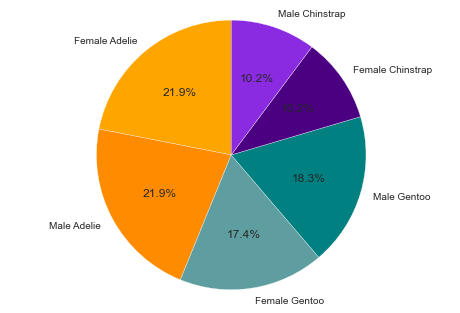

In [497]:
labels = ["Female Adelie", "Male Adelie", "Female Gentoo",
          "Male Gentoo", "Female Chinstrap", "Male Chinstrap"]
colors = ["orange", "darkorange",
          "cadetblue", "teal", "indigo", "blueviolet"]
sizes = [73, 73, 58, 61, 34, 34]
fig, ax = plt.subplots()
ax.pie(sizes, radius=1, autopct='%1.1f%%',
       colors=colors,
       labels=labels, startangle=90)
ax.axis("equal")

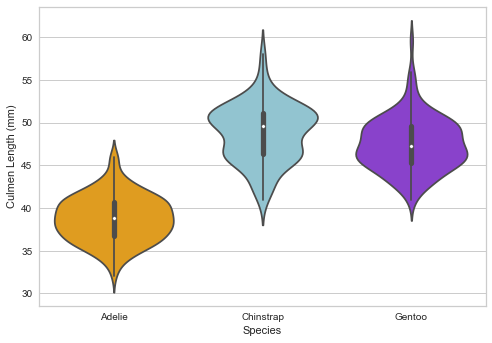

In [498]:
fig, ax = plt.subplots()
df_1 = df[['Species', 'Culmen Length (mm)']]
ax = sns.violinplot(data=df, x="Species", y="Culmen Length (mm)", orient='v', palette=["orange", "c", "#8A2BE2"])

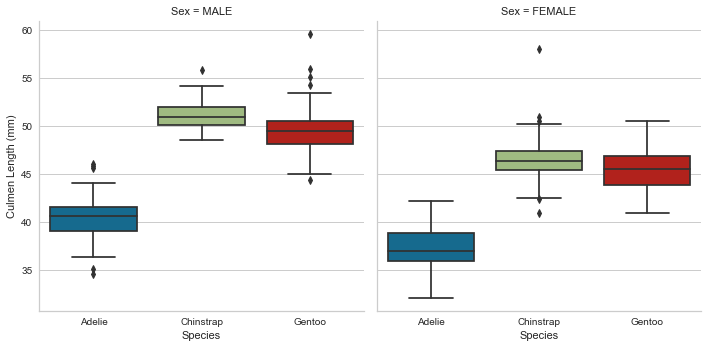

In [499]:
sns.catplot(x='Species',y='Culmen Length (mm)',data=df_none,kind='box',col='Sex')

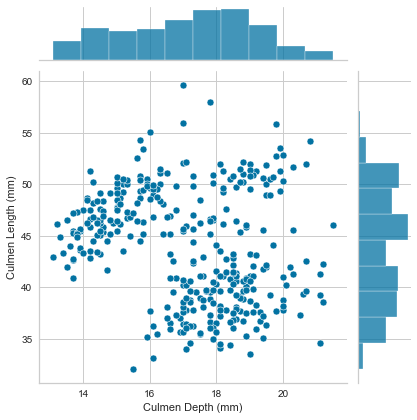

In [500]:
sns.jointplot(x=df['Culmen Depth (mm)'],y=df['Culmen Length (mm)'])

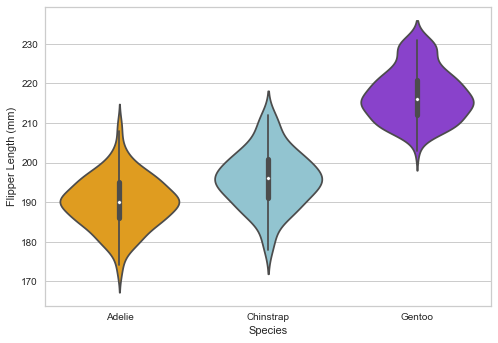

In [501]:
fig, ax = plt.subplots()
df_1 = df[['Species', 'Flipper Length (mm)']]
ax = sns.violinplot(data=df_1, x="Species", y="Flipper Length (mm)", orient='v', palette=["orange", "c", "#8A2BE2"])

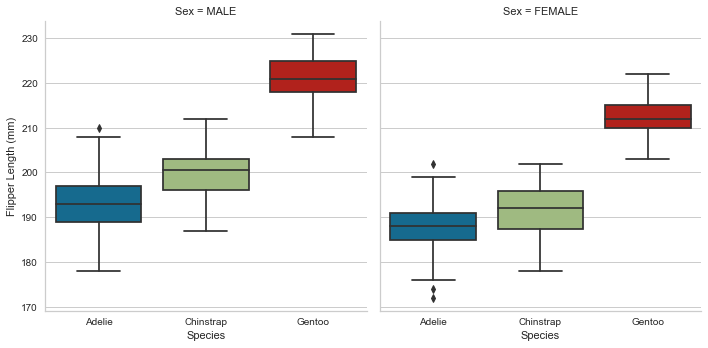

In [502]:
sns.catplot(x='Species',y='Flipper Length (mm)',data=df_none,kind='box',col='Sex')

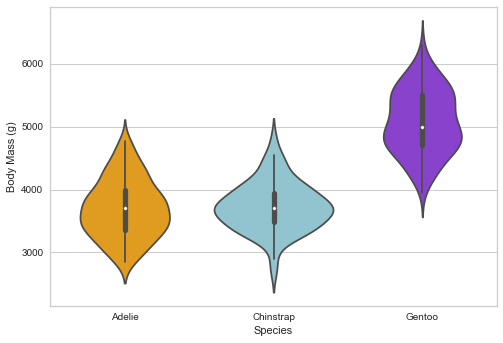

In [503]:
fig, ax = plt.subplots()
df_1 = df[['Species', 'Body Mass (g)']]
ax = sns.violinplot(data=df_1, x="Species", y="Body Mass (g)", orient='v', palette=["orange", "c", "#8A2BE2"])

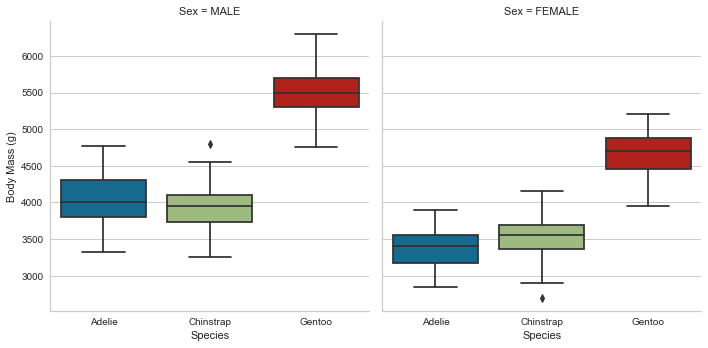

In [504]:
sns.catplot(x='Species',y='Body Mass (g)',data=df_none,kind='box',col='Sex')

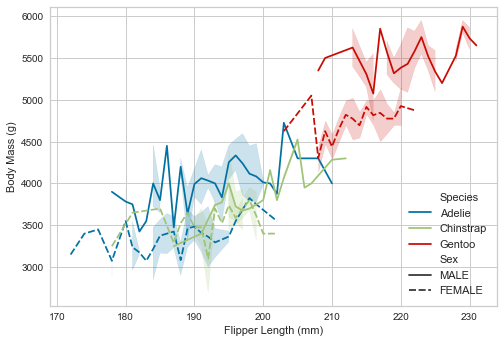

In [505]:
sns.lineplot(x="Flipper Length (mm)",
             y="Body Mass (g)",
             hue="Species",
             style="Sex",
             data=df_none)
sns.set(rc={'figure.figsize':(14,8)})

plt.legend(loc='lower right')

<AxesSubplot:>

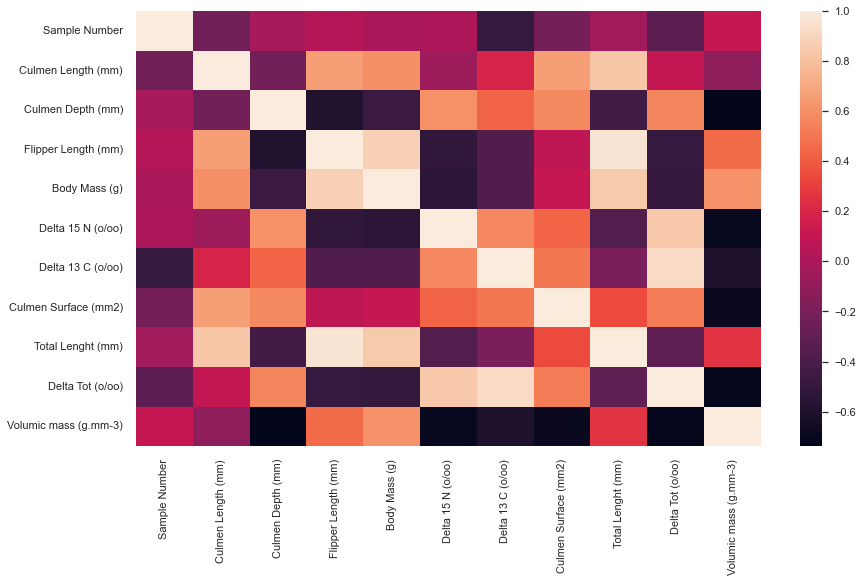

In [506]:
sns.heatmap(df.corr())

ML

In [507]:
df_na=df.dropna()

In [508]:
X=pd.get_dummies(df_na.drop('Species',axis=1))
y=df_na.Species

In [509]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X[numerical_cols],y,test_size=0.3,random_state=101)

In [510]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [511]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [512]:
base_pred=model.predict(X_test)

In [513]:
from sklearn.metrics import classification_report,plot_confusion_matrix

print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.85      0.95      0.90        42
   Chinstrap       0.94      0.73      0.82        22
      Gentoo       0.97      0.97      0.97        35

    accuracy                           0.91        99
   macro avg       0.92      0.88      0.90        99
weighted avg       0.91      0.91      0.91        99



C:\Users\guill\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


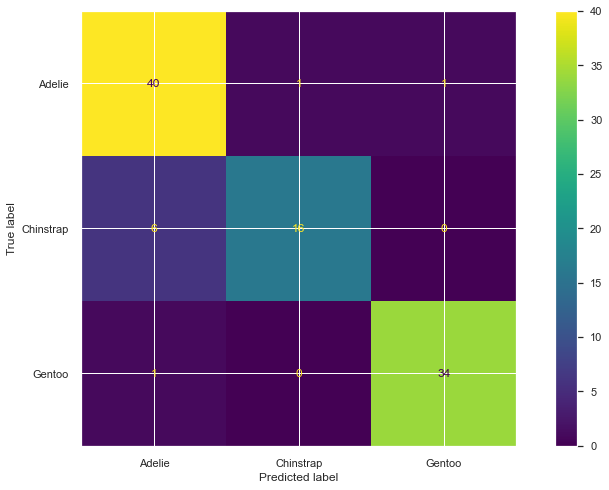

In [514]:
plot_confusion_matrix(model,X_test,y_test)

C:\Users\guill\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


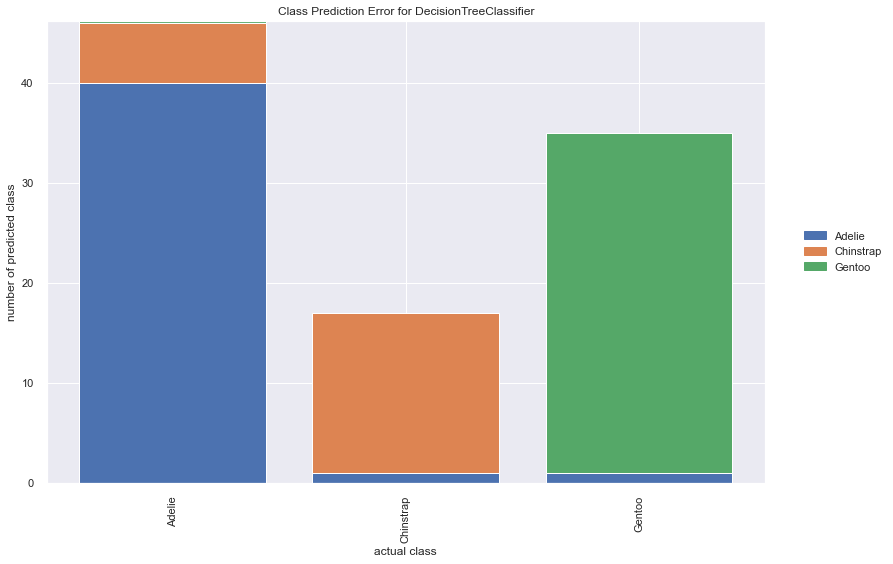

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [515]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof()

In [516]:
X_test.columns

Index(['Sample Number', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Culmen Surface (mm2)', 'Total Lenght (mm)',
       'Delta Tot (o/oo)', 'Volumic mass (g.mm-3)'],
      dtype='object')

In [517]:
model.feature_importances_

array([0.        , 0.34121837, 0.01994427, 0.56701966, 0.        ,
       0.00680092, 0.05851813, 0.        , 0.        , 0.        ,
       0.00649866])

In [518]:
pd.DataFrame(index=X[numerical_cols].columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

Feature Importance
Sample Number                    0.000000
Body Mass (g)                    0.000000
Culmen Surface (mm2)             0.000000
Total Lenght (mm)                0.000000
Delta Tot (o/oo)                 0.000000
Volumic mass (g.mm-3)            0.006499
Delta 15 N (o/oo)                0.006801
Culmen Depth (mm)                0.019944
Delta 13 C (o/oo)                0.058518
Culmen Length (mm)               0.341218
Flipper Length (mm)              0.567020

In [519]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9166666666666666, 'Flipper Length (mm) <= 206.0\ngini = 0.637\nsamples = 231\nvalue = [99, 45, 87]'),
 Text(0.2222222222222222, 0.75, 'Culmen Length (mm) <= 42.3\ngini = 0.428\nsamples = 142\nvalue = [98, 44, 0]'),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 92\nvalue = [92, 0, 0]'),
 Text(0.3333333333333333, 0.5833333333333334, 'Delta 13 C (o/oo) <= -25.076\ngini = 0.211\nsamples = 50\nvalue = [6, 44, 0]'),
 Text(0.2222222222222222, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.4444444444444444, 0.4166666666666667, 'Volumic mass (g.mm-3) <= 0.026\ngini = 0.043\nsamples = 45\nvalue = [1, 44, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(0.5555555555555556, 0.25, 'Delta 15 N (o/oo) <= 9.294\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6666666666666666, 0.083

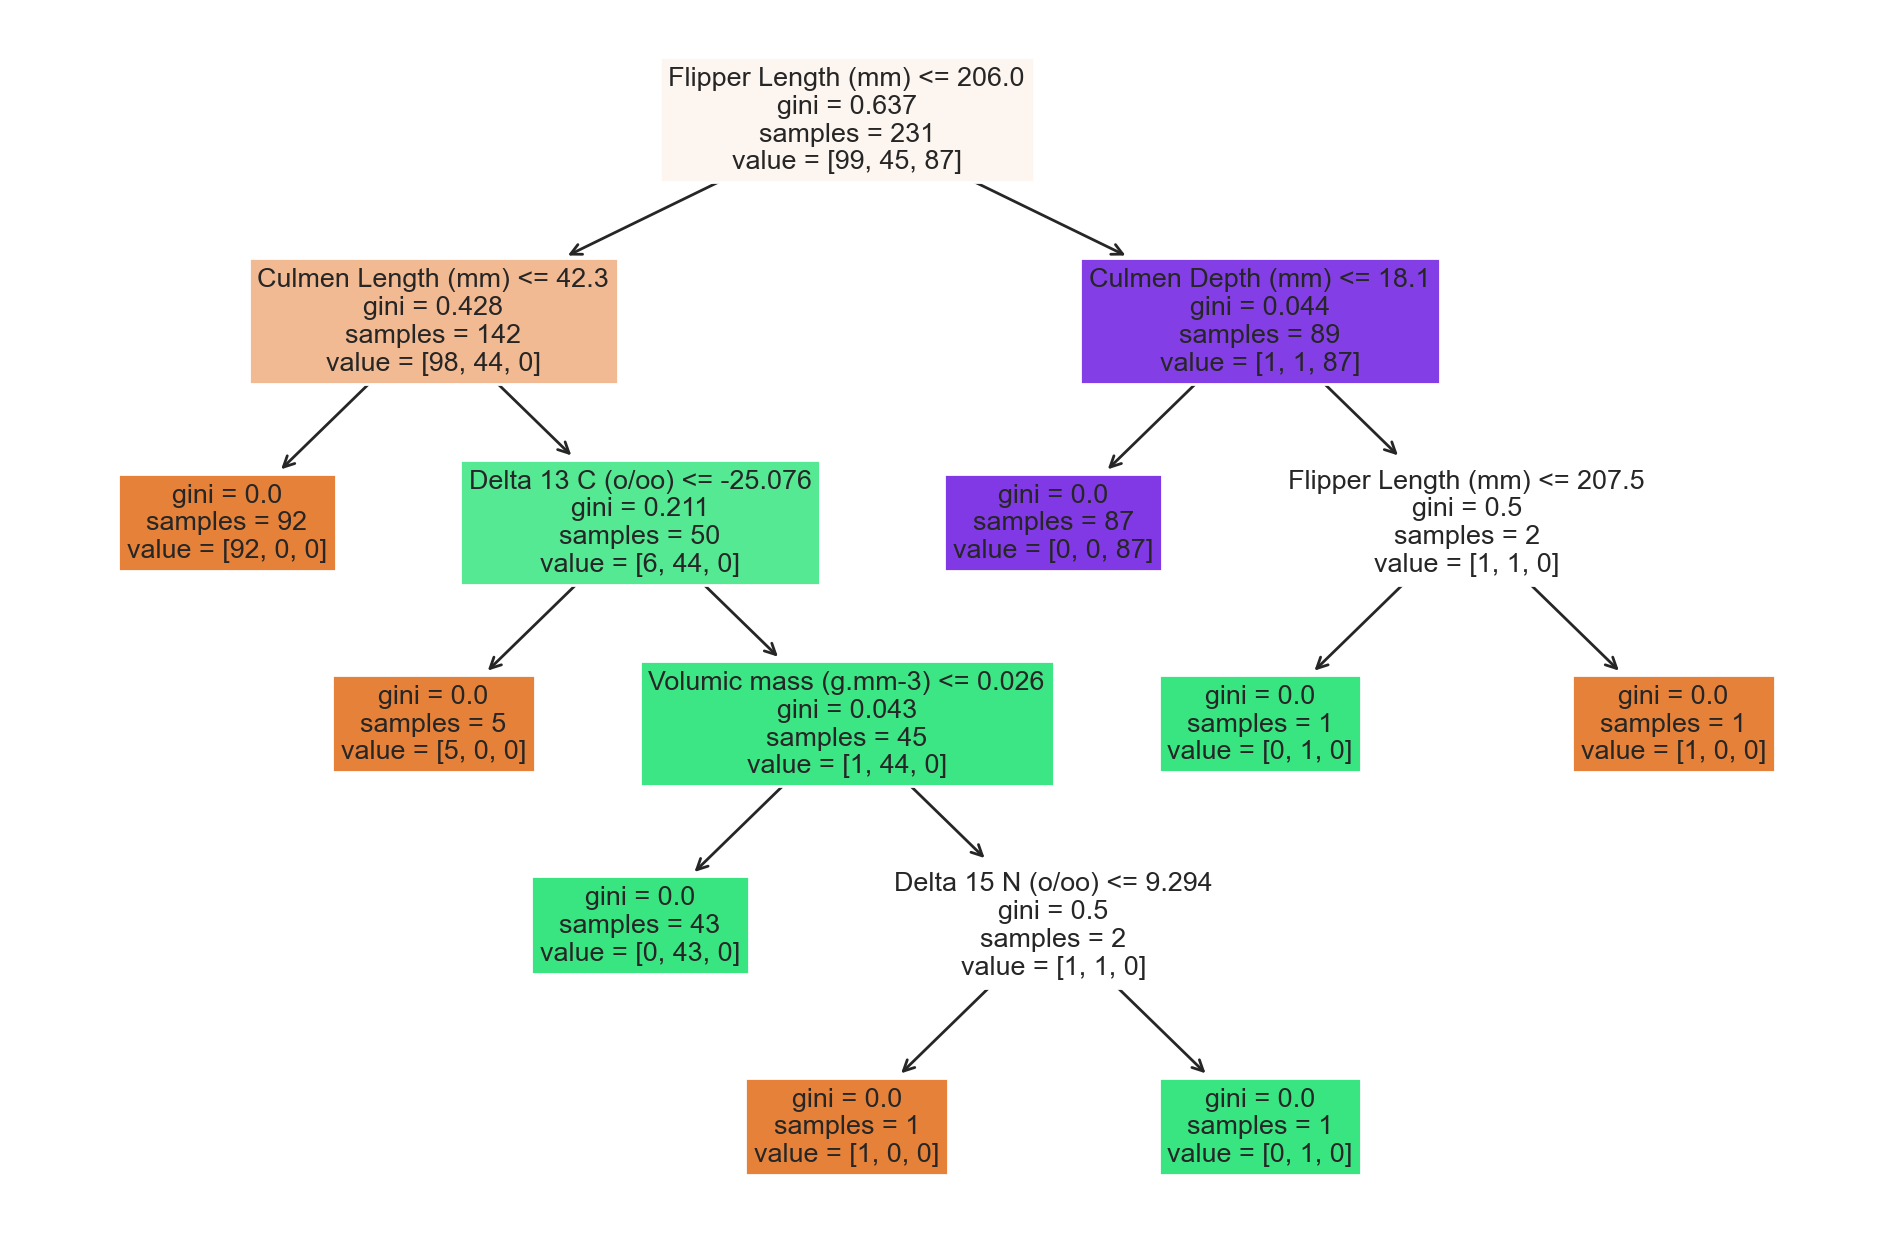

In [520]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,feature_names=X.columns,filled=True)

In [521]:
def report_model(model):
    model_pred=model.predict(X_test)
    print(classification_report(y_test,model_pred))
    print('\n')
    plt.figure(figsize=(12,8),dpi=200)
    plot_tree(model,feature_names=X.columns,filled=True)

              precision    recall  f1-score   support

      Adelie       0.85      0.95      0.90        42
   Chinstrap       0.94      0.73      0.82        22
      Gentoo       0.97      0.97      0.97        35

    accuracy                           0.91        99
   macro avg       0.92      0.88      0.90        99
weighted avg       0.91      0.91      0.91        99





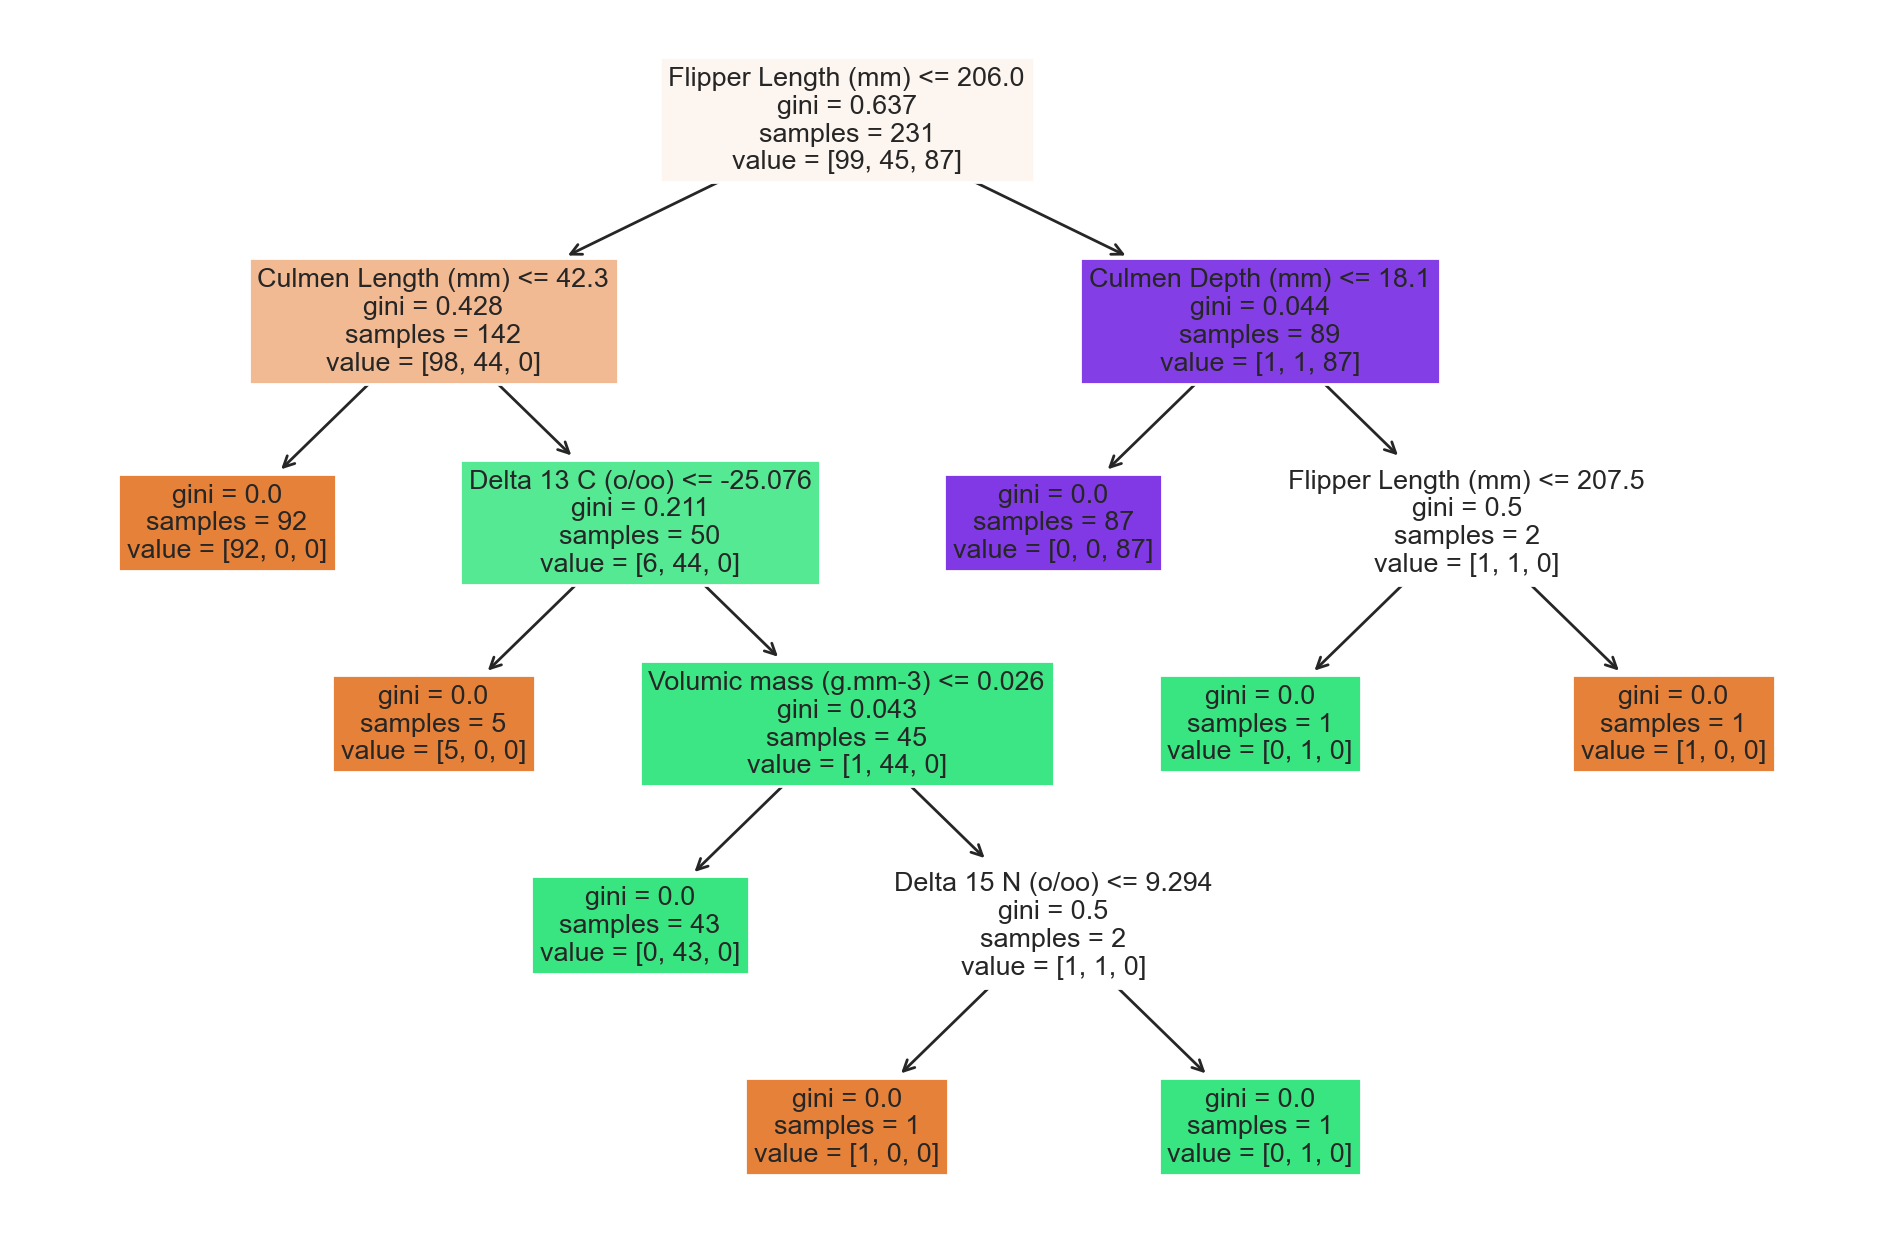

In [522]:
report_model(model)

In [523]:
pruned_tree=DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.88      0.86      0.87        42
   Chinstrap       0.74      0.77      0.76        22
      Gentoo       0.97      0.97      0.97        35

    accuracy                           0.88        99
   macro avg       0.86      0.87      0.86        99
weighted avg       0.88      0.88      0.88        99





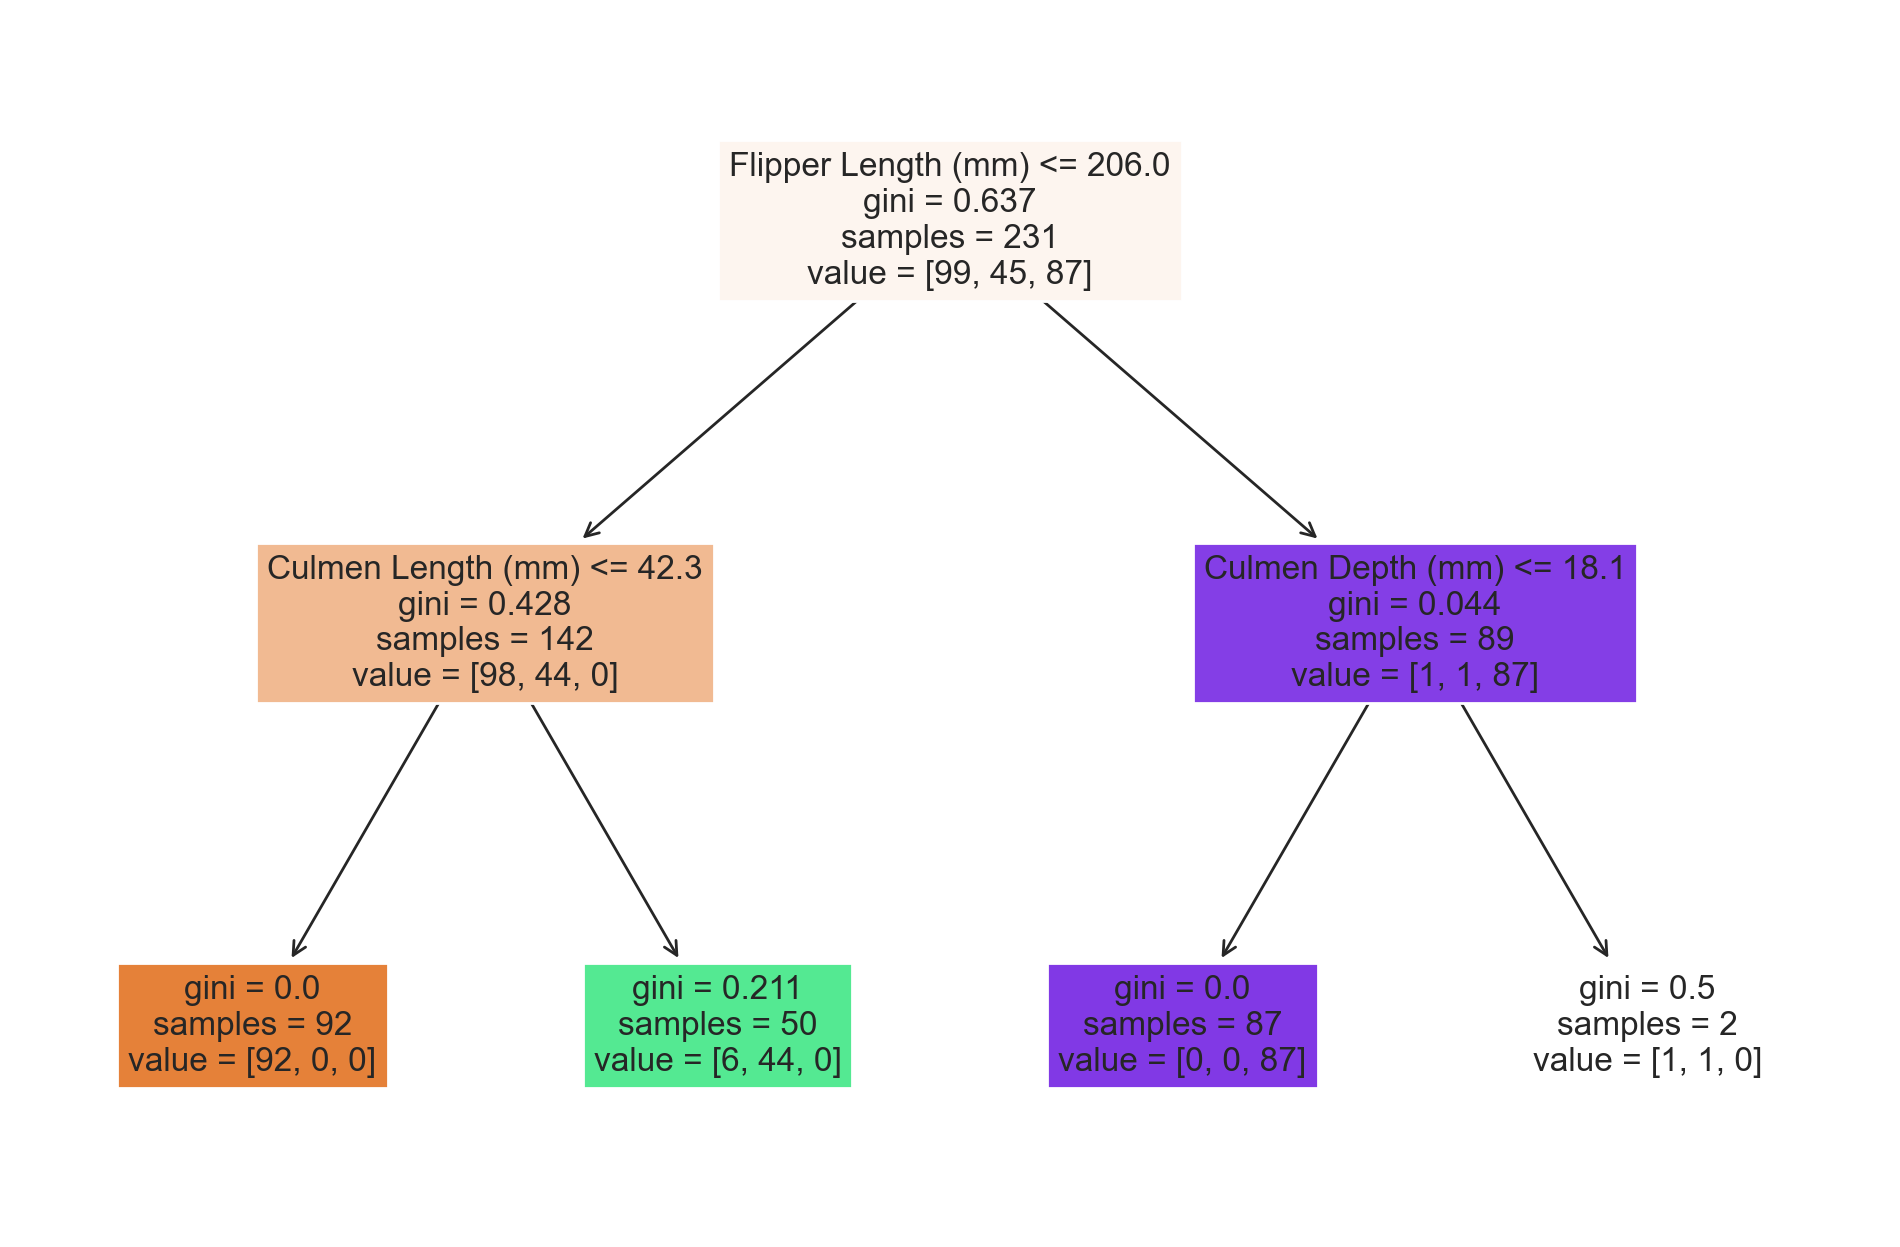

In [524]:
report_model(pruned_tree)